โหลดข้อมูลโควิด19

In [35]:
import pandas as pd

df = pd.read_csv('data/confirmed-cases-since-120864.csv')
df

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,816990,12/8/2021,11/8/2021,ชาย,7.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
1,816991,12/8/2021,11/8/2021,ชาย,1.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
2,816992,12/8/2021,11/8/2021,ชาย,35.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
3,816993,12/8/2021,11/8/2021,หญิง,33.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
4,816994,12/8/2021,11/8/2021,หญิง,14.0,ปี,Thailand,เชียงราย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
213287,1030277,21/8/2021,20/8/2021,ชาย,47.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
213288,1030278,21/8/2021,20/8/2021,ชาย,79.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
213289,1030279,21/8/2021,20/8/2021,ชาย,29.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
213290,1030280,21/8/2021,20/8/2021,ชาย,31.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [36]:
df = df[['No.', 'announce_date', 'sex', 'age','province_of_isolation', 'risk']]
df.head()

,No.,announce_date,sex,age,province_of_isolation,risk
0,816990,12/8/2021,ชาย,7.0,เชียงราย,อื่นๆ
1,816991,12/8/2021,ชาย,1.0,เชียงราย,อื่นๆ
2,816992,12/8/2021,ชาย,35.0,เชียงราย,อื่นๆ
3,816993,12/8/2021,หญิง,33.0,เชียงราย,อื่นๆ
4,816994,12/8/2021,หญิง,14.0,เชียงราย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้


1. ความเสี่ยงของการติดโควิด19

In [37]:
df['risk'].value_counts()

สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้                                       88413
อื่นๆ                                                                             52893
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน                                  29868
อยู่ระหว่างการสอบสวน                                                              25537
ระบุไม่ได้                                                                         5531
สถานที่ทำงาน                                                                       3918
ทัณฑสถาน/เรือนจำ                                                                   3164
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว                                      2191
บุคลากรด้านการแพทย์และสาธารณสุข                                                     897
อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงานใกล้ชิดสัมผัสชาวต่างชาติ เป็นต้น      373
ตรวจก่อนทำหัตถการ                                                                   238
ปอดอักเสบ (Pneumonia)           

2. อายุของผู้ป่วย

In [38]:
df.describe()

,No.,age
count,2.132920e+05,198386.000000
mean,9.236355e+05,36.174134
std,6.157224e+04,17.732531
min,8.169900e+05,1.000000
25%,8.703128e+05,24.000000
50%,9.236355e+05,35.000000
75%,9.769582e+05,48.000000
max,1.030281e+06,119.000000


3. ช่วงอายุ

<Axes: >

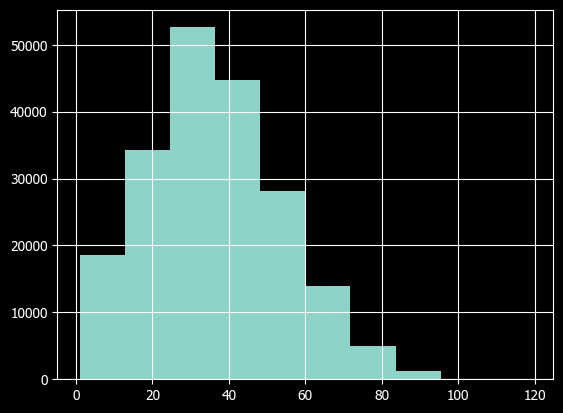

In [39]:
df['age'].hist()

<Axes: >

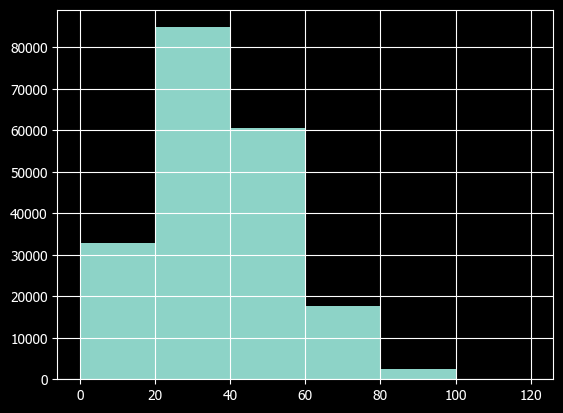

In [40]:
df['age'].hist(bins=[0,20,40,60,80,100,120])

In [41]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'tahoma'

<Axes: >

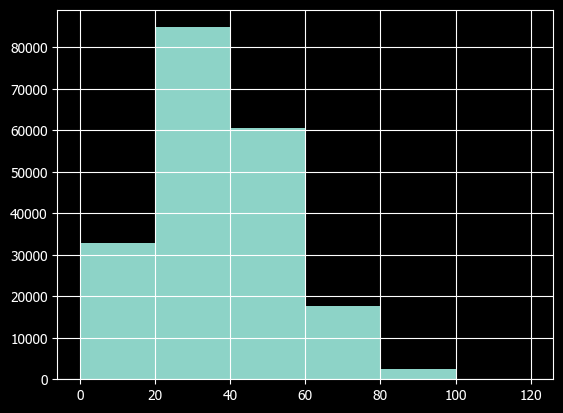

In [42]:
df['age'].hist(bins=[0,20,40,60,80,100,120])

4. จังหวัดที่อยู่ วันนี้มีผู้ติดเชื้อเท่าไหร่

<Axes: xlabel='sex'>

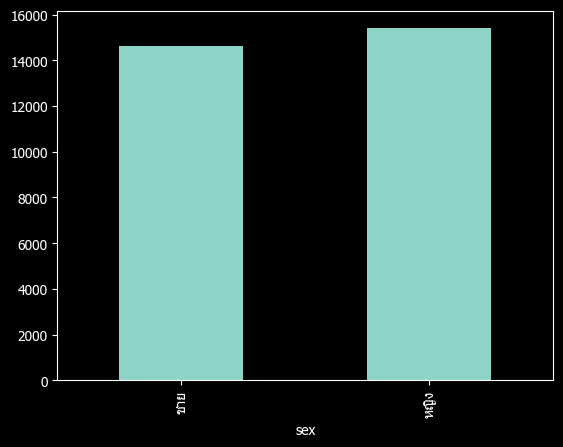

In [43]:
mydf = df[(df['province_of_isolation']=='กรุงเทพมหานคร')  & (df['age'] <= 50)]
mydf.groupby('sex').count()['No.'].plot.bar()

5. แนวโน้มจำนวนผู้ป่วย

In [44]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213292 entries, 0 to 213291
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   No.                    213292 non-null  int64  
 1   announce_date          213292 non-null  object 
 2   sex                    204047 non-null  object 
 3   age                    198386 non-null  float64
 4   province_of_isolation  213292 non-null  object 
 5   risk                   213292 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ MB


,No.,announce_date,sex,age,province_of_isolation,risk
0,816990,12/8/2021,ชาย,7.0,เชียงราย,อื่นๆ


In [45]:
df.insert(0, 'date' , pd.to_datetime(df['announce_date'], format='%d/%m/%Y'), True)
df

,date,No.,announce_date,sex,age,province_of_isolation,risk
0,2021-08-12,816990,12/8/2021,ชาย,7.0,เชียงราย,อื่นๆ
1,2021-08-12,816991,12/8/2021,ชาย,1.0,เชียงราย,อื่นๆ
2,2021-08-12,816992,12/8/2021,ชาย,35.0,เชียงราย,อื่นๆ
3,2021-08-12,816993,12/8/2021,หญิง,33.0,เชียงราย,อื่นๆ
4,2021-08-12,816994,12/8/2021,หญิง,14.0,เชียงราย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
...,...,...,...,...,...,...,...
213287,2021-08-21,1030277,21/8/2021,ชาย,47.0,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ
213288,2021-08-21,1030278,21/8/2021,ชาย,79.0,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ
213289,2021-08-21,1030279,21/8/2021,ชาย,29.0,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ
213290,2021-08-21,1030280,21/8/2021,ชาย,31.0,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213292 entries, 0 to 213291
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   213292 non-null  datetime64[ns]
 1   No.                    213292 non-null  int64         
 2   announce_date          213292 non-null  object        
 3   sex                    204047 non-null  object        
 4   age                    198386 non-null  float64       
 5   province_of_isolation  213292 non-null  object        
 6   risk                   213292 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 11.4+ MB


<Axes: xlabel='date'>

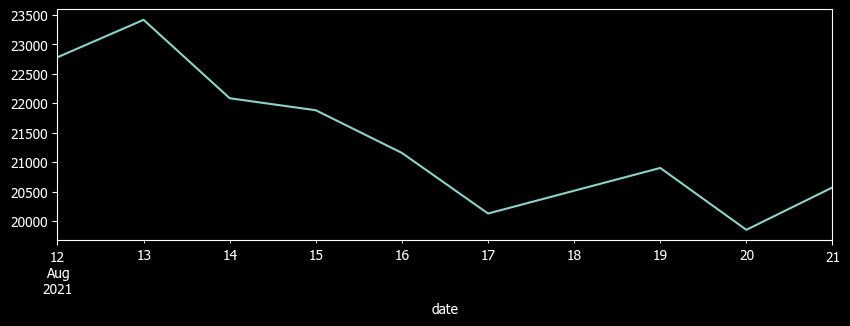

In [47]:
df.groupby('date').count()['No.'].plot.line(figsize=(10,3))

6. อัตราผู้ติดเชื้อโควิด

In [48]:
pop_df = pd.read_csv('data/thai_population_63.csv')
pop_df = pop_df[['จังหวัด', 'รวม']]
pop_df.head()

,จังหวัด,รวม
0,กรุงเทพมหานคร,5588222
1,สมุทรปราการ,1351479
2,นนทบุรี,1276745
3,ปทุมธานี,1176412
4,พระนครศรีอยุธยา,819088


In [49]:
province_df = df.groupby('province_of_isolation').count()['No.'].reset_index()
province_df

,province_of_isolation,No.
0,กทม,722
1,กระบี่,152
2,กรุงเทพมหานคร,44484
3,กาญจนบุรี,3016
4,กาฬสินธุ์,1295
...,...,...
73,เพชรบุรี,1025
74,เพชรบูรณ์,1456
75,เลย,570
76,แพร่,319


In [50]:
df.insert(2, 'province',df['province_of_isolation'].replace('กทม','กรุงเทพมหานคร'),True)

In [53]:
province_df = df.groupby('province').count()['No.'].reset_index()
province_df

,province,No.
0,กระบี่,152
1,กรุงเทพมหานคร,45206
2,กาญจนบุรี,3016
3,กาฬสินธุ์,1295
4,กำแพงเพชร,1347
...,...,...
72,เพชรบุรี,1025
73,เพชรบูรณ์,1456
74,เลย,570
75,แพร่,319


In [55]:
prov_pop_df = pd.merge(province_df, pop_df, left_on='province', right_on='จังหวัด')

In [57]:
prov_pop_df['rate'] = prov_pop_df['No.'] * 100000 / prov_pop_df['รวม']
prov_pop_df

,province,No.,จังหวัด,รวม,rate
0,กระบี่,152,กระบี่,477770,31.814471
1,กรุงเทพมหานคร,45206,กรุงเทพมหานคร,5588222,808.951398
2,กาญจนบุรี,3016,กาญจนบุรี,891976,338.125689
3,กาฬสินธุ์,1295,กาฬสินธุ์,977175,132.524880
4,กำแพงเพชร,1347,กำแพงเพชร,714118,188.624289
...,...,...,...,...,...
72,เพชรบุรี,1025,เพชรบุรี,482193,212.570485
73,เพชรบูรณ์,1456,เพชรบูรณ์,981940,148.277899
74,เลย,570,เลย,638736,89.238747
75,แพร่,319,แพร่,437350,72.939293


In [58]:
top10_prov_df = prov_pop_df.sort_values('rate', ascending=False).head(10).set_index('จังหวัด')
top10_prov_df

,province,No.,รวม,rate
จังหวัด,,,,
สมุทรสาคร,สมุทรสาคร,17579,586199,2998.810984
สมุทรสงคราม,สมุทรสงคราม,2025,192052,1054.401933
สมุทรปราการ,สมุทรปราการ,14051,1351479,1039.675792
ชลบุรี,ชลบุรี,13639,1566885,870.453160
นครนายก,นครนายก,2206,260081,848.197292
กรุงเทพมหานคร,กรุงเทพมหานคร,45206,5588222,808.951398
ระนอง,ระนอง,1494,194372,768.629226
อ่างทอง,อ่างทอง,2049,276584,740.823764
สระบุรี,สระบุรี,4550,643828,706.710488


<Axes: xlabel='จังหวัด'>

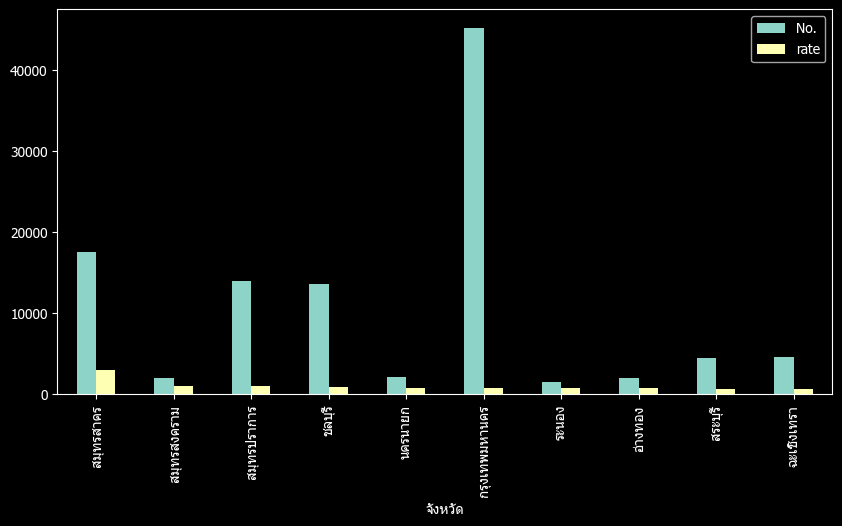

In [65]:
top10_prov_df[['No.','rate']].plot.bar(figsize=(10,5))